
<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Escudo-UdeA.svg/970px-Escudo-UdeA.svg.png" width="300" height="300">
</div>

# **MODELO DE PREDICCIÓN DE TIEMPO DE ESPERA DE LOS ASEGURADOS EN INCIDENTES DE TRÁNSITO**

# **ESTUDIANTES**

# **Diego Fernando Londoño Londoño**

# **Yenny Patricia Vergara Monsalve**

# **1. DESCRIPCIÓN DEL PROYECTO**


El presente proyecto tiene como objetivo desarrollar un modelo predictivo que estime el tiempo de espera de un asegurado tras reportar un accidente de tránsito, con el fin de optimizar los procesos de atención y mejorar la experiencia del cliente en una compañía aseguradora.

La iniciativa surge de la necesidad de contar con herramientas analíticas que permitan anticipar demoras y gestionar de forma eficiente los recursos disponibles en campo, como gestores de siniestros y unidades móviles.

Para ello, se utilizó un conjunto de datos históricos de siniestros, registrados por la aseguradora a través de sus sistemas de gestión durante un período determinado. Estos datos incluyen variables relacionadas con la ubicación, hora del incidente, tipo de accidente, tráfico, disponibilidad de personal y otros factores relevantes como el clima y la distancia.

Se implementó un proceso iterativo que incluyó limpieza, análisis exploratorio, selección de variables y entrenamiento de distintos modelos de machine learning como regresión lineal, árboles de decisión y random forest, evaluando su desempeño mediante métricas como el MAE y el RMSE.

Entre los principales obstáculos se encontraron problemas de calidad de datos, presencia de valores atípicos y desequilibrios en la distribución de los tiempos de atención.

Los resultados obtenidos muestran que el modelo tiene un desempeño aceptable para predecir tiempos de espera con un margen de error razonable, y representa una herramienta valiosa para la toma de decisiones operativas en tiempo real.


# **2. OBJETIVOS**


**Objetivo del Proyecto**

Predecir el tiempo de espera en la atención de un asegurado durante una incidencia de tránsito, desarrollando un modelo de Machine Learning con el fin de brindar soporte al proceso del gestor de seguros.

**Objetivos Específicos**

•	Realizar un análisis exploratorio y limpieza de datos provenientes de los datos históricos de siniestros para identificar patrones, inconsistencias y variables relevantes.

•	Construir variables derivadas (ingeniería de características) que integren factores espaciales, temporales y contextuales como clima, tráfico, distancia, entre otros.

•	Entrenar y comparar modelos de aprendizaje automático para estimar el tiempo de espera, evaluando su desempeño con métricas como MAE, RMSE y R2

•	Seleccionar el modelo con mejor desempeño y validar su capacidad predictiva para su futura integración en los sistemas de gestión de siniestros de la aseguradora.

•	Emitir el conjunto de recomendaciones correspondientes que permitan mejorar el rendimiento del modelo seleccionado en etapas posteriores de la investigación



# **3. IMPORTACIÓN DE LIBRERÍAS**

## **3.1. Librerias y configuraciones previas**

In [1]:
# Gestion de librerias
# ==============================================================================
import numpy as np
import pandas as pd
import math
from importlib import reload

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib

# Preprocesado y modelado
# ==============================================================================

#creación de modelos
from sklearn.ensemble import GradientBoostingRegressor

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import multiprocessing

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from rich import print

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Instalar libereria
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 6.9 MB/s eta 0:00:00


## **3.2. Funciones**

In [2]:
# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):
    '''
    Función para graficar atributos en barras, pair plot o box-plot.
        Parameters:
            ncols       [integer]    Number of columns for subplots.
            data        [dataframe]  Features dataframe.
            columns     [list]       List of names of featutes in dataframe to plot.
            target_var  [string]     Name of column of target variable or feature.
            plot_type   [string]     Name of graphic. [countplot, boxplt or scatterplot]
            title       [string]     Title for figure
            rot         [integer]    Rotation angle for x axis labels
        Returns:
            Plot of figure

    Ejemplos:
        multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)
        multiple_plot(1, d , 'purpose', 'age_yrs', 'boxplot', 'Distribución de la variable próposito vs la edad',90)
        multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)
        multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)
        multiple_plot(3, d , catCols, 'age_yrs', 'boxplot', 'Distribución de la variables categóticas vs. la edad',30)
    '''


    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            zorder=1
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")

        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

# **4. CARGA DE DATOS**

## **4.1. Carga del dataset**

In [3]:
# Cargar dataset final para el procesamiento
# ==============================================================================
import pandas as pd

archivo = "https://github.com/ferdilo04/Monografia_EACD/raw/refs/heads/main/DataSet/DataSet_PREDITIMESACC_V4.xlsx"
df = pd.read_excel(archivo)

# Ver estructura básica
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head(3))

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

Dimensiones del dataset:
(8967, 31)

Primeras filas:

,idproceso,placa,fecha,fechallegada,annoregistro,mesregistro,diaregistro,horaregistro,diasemana,annoatencion,...,Acuerdo,UsuarioRegistra,LiberaVehiculo,ResultadoFallo,Aseguradora,Abogadounico,RandomAbogado,Decripcion,Lluvia,distancia
0,1113,MOY664,2016-06-08 09:20:16.223,2016-06-08 09:20:16.223,2016,6,8,9,Miercoles,2016.0,...,NaN,Juan Felipe Hoyos Botero,NaN,NaN,Liberty Seguros SA,Juan Felipe Hoyos Botero,ELSA ROSA VEGA LOPEZ,Liberty <br>PRELIMINAR <br>LESIONES <br>ASIG 0...,No,8482.615228
1,1114,TSZ179,2016-06-08 11:56:02.857,2016-06-08 11:56:02.857,2016,6,8,11,Miercoles,2016.0,...,NaN,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,Juan Felipe Hoyos Botero,Liberty <br>Lesiones <br>Andres GARCES <br>313...,No,8486.581225
2,1115,STW598,2016-06-08 14:03:49.283,2016-06-08 14:03:49.283,2016,6,8,14,Miercoles,2016.0,...,NaN,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,ELSA ROSA VEGA LOPEZ,Liberty <br>SIMPLE <br>Jorge VELEZ <br>3192538...,No,8482.832639


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

## **4.2. Comprensión de los Datos**


Se realizó un análisis exploratorio sobre el conjunto de datos proporcionado por la empresa AsisNet, que contiene información detallada de accidentes de tránsito atendidos,los datos son proporcionados son partir del **mes de abril del 2016 al 11 de mayo del 2025**.

El DataSet tiene el nombre **DataSet_PREDITIMESACC_V4.xlsx** y se encuentra en formato de excel con extensión .xlsx , con un tamaño de **3.330 Kb** el cual contiene **8967** registros y **31** variables , la información del dataset fue obtenida mediante una consulta Transat SQL en un servidor de base de datos SQL Server, que contiene información de las incidencias de tránsito y de las gestiones de atención realizadas por los agentes de las aseguradoras suscritas a la empresa AsisNet .


**A continuación una descripción de las variables:**

****

| Columna           | Descripción                                                                 | Ejemplo                     |
|-------------------|------------------------------------------------------------------------------|-----------------------------|
| idproceso         | Código para identificar el caso                                              | 10                          |
| placa             | Placa del vehículo                                                           | BQX320                      |
| fecha             | Fecha en que se reporta el accidente                                         | 2025-05-02 10:40:25         |
| fechallegada      | Fecha en que se llega al sitio donde ocurrió el accidente                   | 2025-05-02 10:50:25         |
| annoregistro      | Año en que se reporta el accidente                                           | 2025                        |
| mesregistro       | Mes en que se reporta el accidente                                           | 5                           |
| diaregistro       | Día en que se reporta el accidente                                           | 2                           |
| horaregistro      | Hora en que se reporta el accidente                                          | 10                          |
| diasemana         | Día de la semana en que se reporta el accidente                              | Lunes                       |
| annoatencion      | Año en que se llega al sitio donde ocurrió el accidente                     | 2025                        |
| mesatencion       | Mes en que se llega al sitio donde ocurrió el accidente                     | 5                           |
| diaatencion       | Día en que se llega al sitio donde ocurrió el accidente                     | 2                           |
| Horaantencion     | Hora en que se llega al sitio donde ocurrió el accidente                    | 10                          |
| TiempoAtencion    | Diferencia en minutos entre el reporte y la llegada                         |                             |
| HoraPicoTarde     | ¿Ocurrió en hora pico de la tarde (5 a 7 pm)? (Sí/No)                       | Si                          |
| HoraPicoManana    | ¿Ocurrió en hora pico de la mañana (6:30 a 8:30 am)? (Sí/No)                | No                          |
| InicioNoche       | ¿Ocurrió entre las 7 pm y 11:59 pm? (Sí/No)                                 | No                          |
| Amanecer          | ¿Ocurrió entre las 12 am y 5:59 am? (Sí/No)                                 | Si                          |
| Municipio         | Municipio donde ocurrió el accidente                                         | No                          |
| Intsancia         | Tipo de accidente reportado por la aseguradora                              | Preliminar con lesiones     |
| clienteimportante | Si el asegurado es cliente importante                                       | Banco de accidente          |
| Acuerdo           | Al acuerdo que se llega entre las partes implicadas                         | Tránsito                    |
| UsuarioRegistra   | Usuario que registra el caso en el sistema                                   | Carolina Garcia Valencia    |
| LiberaVehiculo    | Si el vehículo fue retenido y luego liberado                                | Liberado                    |
| ResultadoFallo    | Si el fallo en audiencias es a favor o en contra                            | A favor                     |
| Aseguradora       | Aseguradora que reporta el accidente                                        | Liberty Seguros             |
| Abogadounico      | Abogado disponible para atender el caso                                     | Carolina Garcia Valencia    |
| RandomAbogado     | Abogado que finalmente atiende el caso                                      | Carolina Garcia Valencia    |
| LLuvia     | Indica si en esa fecha y horario estuvo lloviendo                                      | No   |
| Distancia     | Distancia en metros que hay entre el la ubicación del abogado y el lugar de la incidencia                                     | 8482,61522842257   |


# **5. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

##**5.1. Resumen General del Dataset**

In [4]:
# Identificar columnas numéricas y columnas categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("[bold]RESUMEN GENERAL DEL DATASET [/bold]")
print(f"Total de filas: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")
print(f"Variables numéricas: {len(numeric_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")


RESUMEN GENERAL DEL DATASET 

Total de filas: 8967

Total de columnas: 31

Variables numéricas: 11

Variables categóricas: 20

### **5.1.1. Identificación de los tipos de columnas que tiene el DataSet**

In [5]:
df.info() #Visualización de las columnas e identificación de los tipos de columnas que tiene el DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idproceso          8967 non-null   int64  
 1   placa              8967 non-null   object 
 2   fecha              8967 non-null   object 
 3   fechallegada       8040 non-null   object 
 4   annoregistro       8967 non-null   int64  
 5   mesregistro        8967 non-null   int64  
 6   diaregistro        8967 non-null   int64  
 7   horaregistro       8967 non-null   int64  
 8   diasemana          8967 non-null   object 
 9   annoatencion       8040 non-null   float64
 10  mesatencion        8040 non-null   float64
 11  diaatencion        8040 non-null   float64
 12  Horaantencion      8040 non-null   float64
 13  TiempoAtencion     8040 non-null   float64
 14  HoraPicoTarde      8967 non-null   object 
 15  HoraPicoManana     8967 non-null   object 
 16  InicioNoche        8967 

### **Interpretación del Dataset**


| **Aspecto**                               | **Variable(s)**                                                                                                                                                                                | **Descripción e Interpretación**                                                                                                                                                                                                                                                                  |
| ----------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Identificación del registro**           | idproceso, placa                                                                                                                                                                               | Identifican de forma única cada proceso y el vehículo involucrado. Permiten trazabilidad y análisis por caso o cliente.                                                                                                                                                                           |
| **Dimensión del dataset**                 | —                                                                                                                                                                                              | 8.967 registros y 31 variables, con un tamaño aproximado de 2.1 MB.                                                                                                                                                                                                                               |
| **Tipo de problema**                      | TiempoAtencion (variable objetivo)                                                                                                                                                             | Predicción de un valor continuo que representa el tiempo de atención en minutos. Se trata de un problema de regresión supervisada.                                                                                                                                                                |
| **Estructura general de datos**           | —                                                                                                                                                                                              | 20 variables categóricas, 5 numéricas enteras y 6 numéricas decimales.                                                                                                                                                                                                                            |
| **Fechas y tiempos de registro**          | fecha, annoregistro, mesregistro, diaregistro, horaregistro, diasemana                                                                                                                         | Representan la fecha y hora del registro del siniestro. Están completas y permiten generar variables derivadas como día laboral, fin de semana o franja horaria.                                                                                                                                  |
| **Fechas y tiempos de atención**          | fechallegada, annoatencion, mesatencion, diaatencion, Horaantencion                                                                                                                            | Describen el momento en que inicia la atención del caso. Presentan aproximadamente un 10% de valores faltantes.                                                                                                                                                                                   |
| **Variable objetivo (Target)**            | TiempoAtencion                                                                                                                                                                                 | Indica el tiempo total de atención en minutos. Contiene 8.040 valores válidos, equivalentes al 90 % de los casos.                                                                                                                                                                                 |
| **Condiciones del evento**                | HoraPicoTarde, HoraPicoManana, InicioNoche, Amanecer, Lluvia, Municipio, distancia                                                                                                             | Describen las condiciones externas del siniestro, como clima, ubicación, distancia y momento del día. Estas variables pueden influir significativamente en el tiempo de atención.                                                                                                                 |
| **Gestión operativa**                     | Instancia, UsuarioRegistra, Aseguradora, Abogadounico, RandomAbogado                                                                                                                           | Contienen información administrativa sobre la atención y gestión del caso. Pueden ser predictoras del desempeño del proceso.                                                                                                                                                                      |
| **Variables complementarias**             | clienteimportante, Acuerdo, LiberaVehiculo, ResultadoFallo, Decripcion                                                                                                                         | Campos asociados al estado o resultado del caso. Presentan altos porcentajes de valores nulos (entre 60 % y 99 %). Decripcion contiene texto libre no estructurado.                                                                                                                               |
| **Porcentaje de valores nulos**           | —                                                                                                                                                                                              | Muy alto en ResultadoFallo (99,5 %), LiberaVehiculo (98 %), clienteimportante (95,9 %), Acuerdo (59 %) y moderado (≈10 %) en Lluvia y variables de atención (Horaantencion, diaatencion, mesatencion, annoatencion).                                                                              |
| **Problemas detectados**                  | —                                                                                                                                                                                              | Alta proporción de datos faltantes; redundancia temporal entre variables de fecha; codificación de variables booleanas en texto (Sí/No); registros incompletos sin atención; presencia de texto libre sin estructurar.                                                                            |
| **Variables relevantes para el modelado** | Temporales: horaregistro, diasemana, HoraPicoManana, HoraPicoTarde, InicioNoche, Amanecer.<br>Contextuales: Municipio, distancia, Lluvia.<br>Operativas: Instancia, Aseguradora, Abogadounico. | Variables con mayor potencial explicativo para modelar el tiempo de atención.                                                                                                                                                                                                                     |
| **Conclusión general**                    | —                                                                                                                                                                                              | El dataset refleja los procesos de atención a siniestros con información suficiente para modelar el tiempo de atención. Requiere limpieza de nulos, recodificación de variables, consolidación temporal y selección de variables relevantes para lograr un modelo predictivo confiable y robusto. |





### **5.1.2. Clasificación Según Tipo de Variable**

In [6]:
# =========================================================
# CLASIFICACIÓN DE VARIABLES POR TIPO
# =========================================================

def clasificar_columnas(df):
    """
    Clasifica las columnas en numéricas y categóricas para aplicar estrategias diferentes.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    print("Variables Numéricas:", num_cols)
    print("Variables Categóricas:", cat_cols)

    return num_cols, cat_cols

# ejemplo de uso:
num_cols, cat_cols = clasificar_columnas(df)

Variables Numéricas:
[
    'idproceso',
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'TiempoAtencion',
    'distancia'
]

Variables Categóricas:
[
    'placa',
    'fecha',
    'fechallegada',
    'diasemana',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'Instancia',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'Abogadounico',
    'RandomAbogado',
    'Decripcion',
    'Lluvia'
]

## **5.2. Estadísticas descriptivas**

In [7]:
# Estadísticas descriptivas
print("\n\n [bold]===== Estadísticas Descriptivas: ===== [/bold]\n\n")
print(df.describe())

===== Estadísticas Descriptivas: ===== 

idproceso  annoregistro  mesregistro  diaregistro  horaregistro  \
count   8967.000000   8967.000000  8967.000000  8967.000000   8967.000000   
mean   44100.845322   2020.194268     6.805063    15.930523     14.055425   
std    14001.798155      2.342271     3.555137     8.838929      4.707902   
min     1113.000000   2016.000000     1.000000     1.000000      0.000000   
25%    39714.500000   2018.000000     4.000000     8.000000     11.000000   
50%    47688.000000   2021.000000     7.000000    16.000000     14.000000   
75%    54832.500000   2022.000000    10.000000    24.000000     18.000000   
max    58954.000000   2025.000000    12.000000    31.000000     23.000000   

       annoatencion  mesatencion  diaatencion  Horaantencion  TiempoAtencion  \
count   8040.000000   8040.00000  8040.000000    8040.000000      8040.00000   
mean    2020.020647      6.80398    15.817040      14.583831      2976.15510   
std        2.276523      3.52199     8.863927       5.107983     27272.73376   
min     2016.000000      1.00000     1.000000       0.000000         0.00000   
25%     2018.000000      4.00000     8.000000      11.000000        12.00000   
50%     2020.000000      7.00000    16.000000      15.000000        28.00000   
75%     2022.000000     10.00000    23.000000      19.000000       225.25000   
max     2025.000000     12.00000    31.000000      23.000000    878976.00000   

          distancia  
count   8967.000000  
mean    8484.481152  
std      304.845399  
min     1759.926915  
25%     8482.191998  
50%     8483.506851  
75%     8486.799330  
max    13230.957749

###**5.2.1.Análisis exploratorio (EDA) Variable Objetivo **TiempoAtencion****

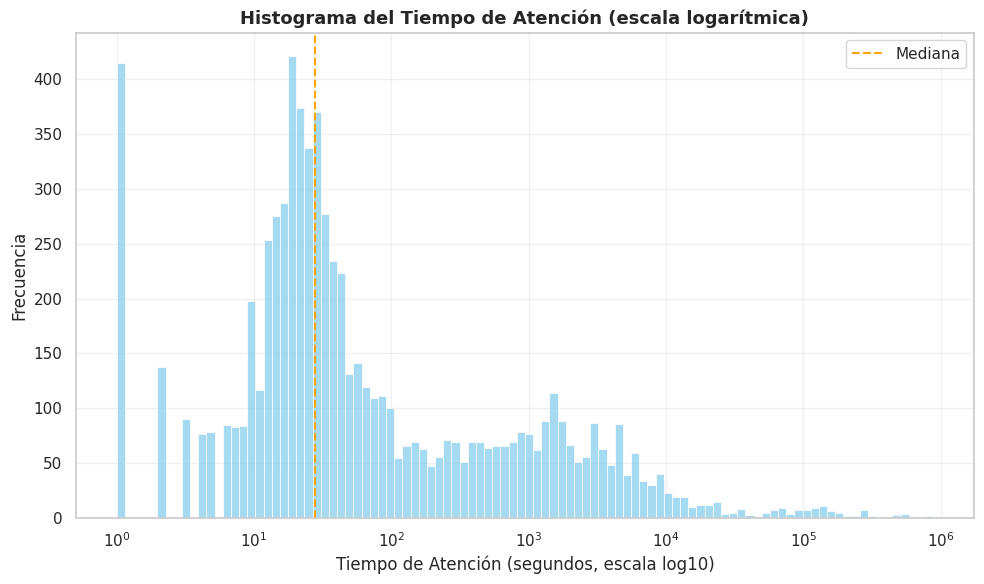

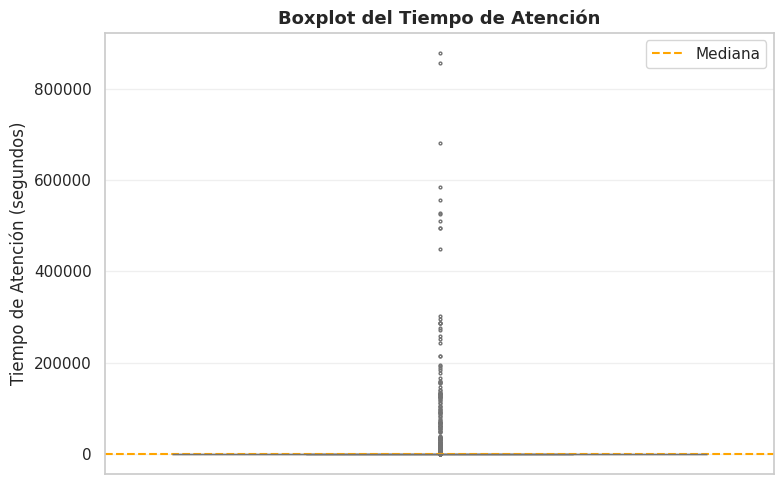

In [8]:
# =====================================================
# Análisis Exploratorio de Datos (EDA)
# Variable objetivo: TiempoAtencion
# =====================================================

# --- Asegurar que la columna TiempoAtencion exista ---
columna_objetivo = "TiempoAtencion"
if columna_objetivo not in df.columns:
    raise KeyError(f"La columna '{columna_objetivo}' no se encuentra en el dataset.")

# Eliminar valores nulos y negativos si existen ---
df = df[df[columna_objetivo].notnull() & (df[columna_objetivo] >= 0)]


# HISTOGRAMA DEL TIEMPO DE ATENCIÓN (escala logarítmica)
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x=columna_objetivo,
    bins=100,
    color='skyblue',
    log_scale=(True, False)
)
plt.axvline(df[columna_objetivo].median(), color='orange', linestyle='--', label='Mediana')
plt.title("Histograma del Tiempo de Atención (escala logarítmica)", fontsize=13, weight='bold')
plt.xlabel("Tiempo de Atención (segundos, escala log10)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Figura1_Histograma_TiempoAtencion.png", dpi=300)
plt.show()


#  BOXPLOT DEL TIEMPO DE ATENCIÓN
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    y=columna_objetivo,
    color='lightgreen',
    fliersize=2
)
plt.axhline(df[columna_objetivo].median(), color='orange', linestyle='--', label='Mediana')
plt.title("Boxplot del Tiempo de Atención", fontsize=13, weight='bold')
plt.ylabel("Tiempo de Atención (segundos)")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("Figura2_Boxplot_TiempoAtencion.png", dpi=300)
plt.show()


## **5.3. Identificación de valores nulos, atípicos y correlaciones**

### **5.3.1. Hallazgo de Valores Nulos**

 [TABLA RESUMEN DE VALORES NULOS] 

,Valores Nulos,Porcentaje (%)
ResultadoFallo,7995,99.44%
LiberaVehiculo,7897,98.22%
clienteimportante,7674,95.45%
Acuerdo,4494,55.90%
Abogadounico,372,4.63%
Aseguradora,14,0.17%
Lluvia,7,0.09%


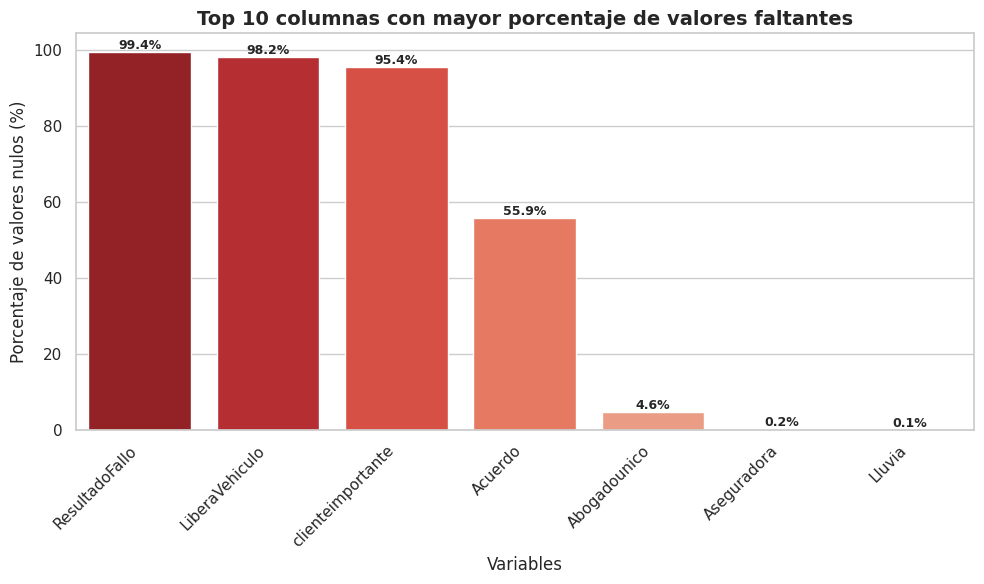

[REPORTE INTERPRETATIVO]

-------------------------------------------------

Total de columnas analizadas: 31

-Columnas con valores faltantes: 7

-Columnas sin valores faltantes: 24

Distribución según nivel de ausencia

Alta ausencia (> 50%): 4 columnas

Media ausencia (10%–50%): 0 columnas

Baja ausencia (≤ 10%): 3 columnas

RESUMEN EJECUTIVO:

        El análisis de valores faltantes evidenció que 7 variables presentan datos ausentes.
        Entre ellas, 4 superan el umbral del 50%, lo cual sugiere evaluar su eliminación
        o una imputación avanzada. 0 variables presentan una ausencia moderada que podría
        corregirse con imputaciones simples (media o moda), mientras que 3 columnas muestran
        una pérdida mínima de información. Este análisis permite definir estrategias de limpieza antes del 
modelado.

In [9]:
# ============================================================
#  ANÁLISIS DE VALORES NULOS
# ============================================================

def analizar_valores_nulos(df, umbral_alto=50, umbral_medio=10):
    """
    Analiza la cantidad y el porcentaje de valores nulos en un DataFrame.
    Genera tabla, gráfico y reporte interpretativo en español.
    """

    # Calcular valores nulos absolutos y porcentuales
    missing_abs = df.isnull().sum()
    missing_pct = (missing_abs / len(df)) * 100

    # Crear tabla consolidada y ordenada
    missing_table = pd.DataFrame({
        'Valores Nulos': missing_abs,
        'Porcentaje (%)': missing_pct
    })
    missing_table = missing_table[missing_table['Valores Nulos'] > 0].sort_values(
        by='Valores Nulos', ascending=False
    )

    # Mostrar tabla estilizada
    if not missing_table.empty:
        print("\n\n [bold] [TABLA RESUMEN DE VALORES NULOS] [/bold]\n\n")
        display(
            missing_table.style
            .format({'Porcentaje (%)': '{:.2f}%'})
            .background_gradient(cmap='Reds', subset=['Valores Nulos', 'Porcentaje (%)'])
            .set_caption("\n\n Resumen de Valores Faltantes por Variable \n\n")
        )

        # Gráfico de barras con las columnas con más valores nulos
        top_missing = missing_table.head(10)

        plt.figure(figsize=(10, 6))
        bars = sns.barplot(
            x=top_missing.index,
            y=top_missing['Porcentaje (%)'],
            palette="Reds_r"
        )

        # Añadir etiquetas de porcentaje sobre cada barra
        for container in bars.containers:
            bars.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9, weight='bold')

        plt.title("Top 10 columnas con mayor porcentaje de valores faltantes", fontsize=14, fontweight='bold')
        plt.xlabel("Variables", fontsize=12)
        plt.ylabel("Porcentaje de valores nulos (%)", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Clasificación de variables según nivel de ausencia
        cols_alta_ausencia = missing_table[missing_table['Porcentaje (%)'] > umbral_alto].index.tolist()
        cols_media_ausencia = missing_table[
            (missing_table['Porcentaje (%)'] > umbral_medio) &
            (missing_table['Porcentaje (%)'] <= umbral_alto)
        ].index.tolist()
        cols_baja_ausencia = missing_table[missing_table['Porcentaje (%)'] <= umbral_medio].index.tolist()

        # Reporte interpretativo automático
        print("\n\n [REPORTE INTERPRETATIVO]\n\n")
        print("-------------------------------------------------")
        print(f"Total de columnas analizadas: {len(df.columns)}")
        print(f"-Columnas con valores faltantes: {len(missing_table)}")
        print(f"-Columnas sin valores faltantes: {len(df.columns) - len(missing_table)}")

        print(f"\n\n Distribución según nivel de ausencia\n\n")
        print(f"Alta ausencia (> {umbral_alto}%): {len(cols_alta_ausencia)} columnas")
        print(f"Media ausencia ({umbral_medio}%–{umbral_alto}%): {len(cols_media_ausencia)} columnas")
        print(f"Baja ausencia (≤ {umbral_medio}%): {len(cols_baja_ausencia)} columnas")

        # Resumen ejecutivo para informe
        resumen = f"""

        RESUMEN EJECUTIVO:

        El análisis de valores faltantes evidenció que {len(missing_table)} variables presentan datos ausentes.
        Entre ellas, {len(cols_alta_ausencia)} superan el umbral del {umbral_alto}%, lo cual sugiere evaluar su eliminación
        o una imputación avanzada. {len(cols_media_ausencia)} variables presentan una ausencia moderada que podría
        corregirse con imputaciones simples (media o moda), mientras que {len(cols_baja_ausencia)} columnas muestran
        una pérdida mínima de información. Este análisis permite definir estrategias de limpieza antes del modelado.

        """
        print(resumen)

    else:
        print("\n No se encontraron valores faltantes en el dataset. El conjunto de datos está completamente completo.")

    return missing_table



#  EJECUCIÓN DEL ANÁLISIS
missing_table = analizar_valores_nulos(df)


### **5.3.2. Identificación Columnas a Eliminar o Imputar**




In [10]:
# =====================================================
# DECISIÓN AUTOMÁTICA: Eliminar o imputar columnas según porcentaje de nulos
# =====================================================

# Calcular valores nulos absolutos y porcentuales
missing_abs = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

# Crear tabla resumen
missing_table = pd.DataFrame({
    'Valores Nulos': missing_abs,
    'Porcentaje (%)': missing_pct
}).sort_values(by='Porcentaje (%)', ascending=False)

# Definición del umbral para eliminar o imputar columnas con nulos
umbral = 30.0  # 30%

# Separar columnas según criterio
cols_eliminar = missing_table[missing_table['Porcentaje (%)'] > umbral].index.tolist()
cols_imputar = missing_table[(missing_table['Porcentaje (%)'] > 0) & (missing_table['Porcentaje (%)'] <= umbral)].index.tolist()

print(f"\n\n Columnas a ELIMINAR (más del {umbral}% de nulos):")
print(cols_eliminar if cols_eliminar else "Ninguna")

print(f"\n\n Columnas a IMPUTAR (hasta {umbral}% de nulos):")
print(cols_imputar if cols_imputar else "Ninguna")


Columnas a ELIMINAR (más del 30.0% de nulos):

['ResultadoFallo', 'LiberaVehiculo', 'clienteimportante', 'Acuerdo']

Columnas a IMPUTAR (hasta 30.0% de nulos):

['Abogadounico', 'Aseguradora', 'Lluvia']

### **5.3.3. Hallazgo de Valores Únicos**

,Valores Únicos,Total Registros,Porcentaje Únicos (%),Tipo de Dato
idproceso,8040,8040,100.00%,int64
fecha,8040,8040,100.00%,object
fechallegada,8040,8040,100.00%,object
Decripcion,8025,8040,99.81%,object
placa,7537,8040,93.74%,object
TiempoAtencion,1847,8040,22.97%,float64
distancia,1807,8040,22.48%,float64
Abogadounico,70,8040,0.87%,object
diaatencion,31,8040,0.39%,float64
diaregistro,31,8040,0.39%,int64


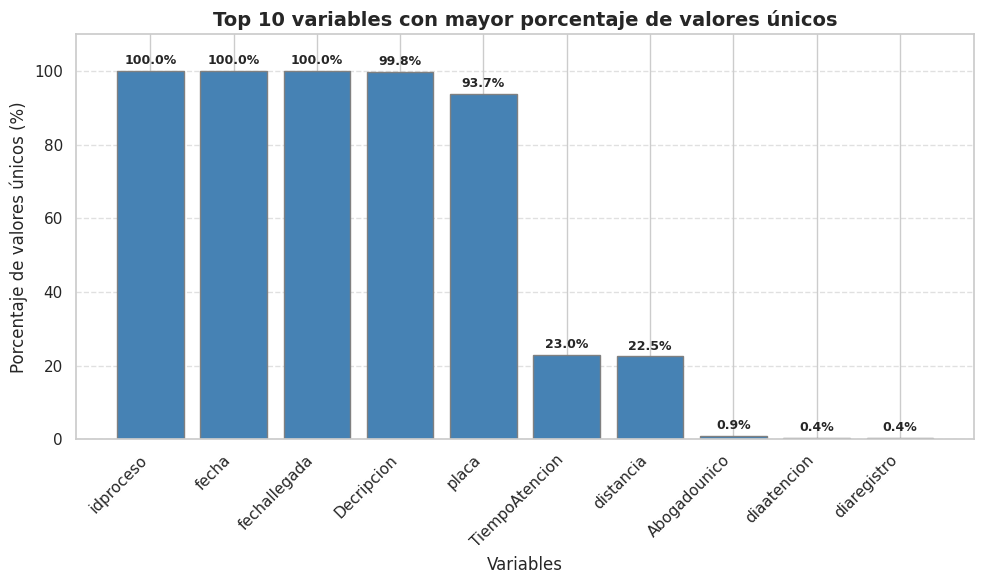

[REPORTE DE CARDINALIDAD]

------------------------------------------------

Total de variables analizadas: 31

-Columnas con alta cardinalidad (> 50 valores únicos): 8

-Columnas sin variación (1 solo valor): 0

-Columnas con cardinalidad adecuada: 23

Alta cardinalidad (8): ['idproceso', 'fecha', 'fechallegada', 'Decripcion', 'placa', 'TiempoAtencion', 'distancia',
'Abogadounico']

Cardinalidad adecuada (23): Ejemplo: ['annoregistro', 'mesregistro', 'diaregistro', 'horaregistro', 'diasemana']...

RESUMEN EJECUTIVO:

    El análisis de cardinalidad permitió identificar las variables con mayor y menor nivel de variabilidad.
    Se encontraron 8 columnas con alta cardinalidad, las cuales pueden generar ruido o sobreajuste en el modelo
    (por ejemplo: identificadores únicos o fechas exactas).
    Asimismo, 0 columnas no presentan cambios y podrían eliminarse por no aportar información relevante.
    Las 23 variables restantes poseen una variabilidad adecuada para el modelado predictivo.

In [11]:
# ============================================================
# ANÁLISIS AUTOMÁTICO DE VALORES ÚNICOS (CARDINALIDAD)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

def analizar_cardinalidad(df, umbral_alto=50, umbral_bajo=1):
    """
    Analiza la cardinalidad de cada variable en un DataFrame.
    Genera una tabla resumen, un gráfico del Top 10 y un reporte textual.
    """

    # 1️ Cálculo de valores únicos
    unique_counts = df.nunique().sort_values(ascending=False)
    unique_table = pd.DataFrame({
        'Valores Únicos': unique_counts,
        'Total Registros': len(df)
    })
    unique_table['Porcentaje Únicos (%)'] = (unique_table['Valores Únicos'] / len(df)) * 100
    unique_table['Tipo de Dato'] = df.dtypes

    # 2️ Clasificación según los umbrales definidos
    cols_sin_variacion = unique_table[unique_table['Valores Únicos'] <= umbral_bajo].index.tolist()
    cols_alta_card = unique_table[unique_table['Valores Únicos'] > umbral_alto].index.tolist()
    cols_normales = [col for col in df.columns if col not in cols_sin_variacion + cols_alta_card]

    # 3️ Mostrar tabla resumen estilizada
    display(
        unique_table.style.format({'Porcentaje Únicos (%)': '{:.2f}%'}).background_gradient(
            cmap='Blues', subset=['Valores Únicos', 'Porcentaje Únicos (%)']
        ).set_caption("=====[bold] TABLA RESUMEN DE VALORES ÚNICOS =====[/bold]")
    )

    # 4️ Gráfico del Top 10 de variables con más valores únicos
    top10_unique = unique_table.sort_values('Porcentaje Únicos (%)', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(top10_unique.index, top10_unique['Porcentaje Únicos (%)'],
                   color='steelblue', edgecolor='gray')

    # Etiquetas encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%",
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Personalización del gráfico
    plt.title("Top 10 variables con mayor porcentaje de valores únicos", fontsize=14, fontweight='bold')
    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Porcentaje de valores únicos (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 110)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 5️ Reporte textual interpretativo
    print("\n [REPORTE DE CARDINALIDAD]")
    print("------------------------------------------------")
    print(f"Total de variables analizadas: {len(df.columns)}")
    print(f"-Columnas con alta cardinalidad (> {umbral_alto} valores únicos): {len(cols_alta_card)}")
    print(f"-Columnas sin variación (1 solo valor): {len(cols_sin_variacion)}")
    print(f"-Columnas con cardinalidad adecuada: {len(cols_normales)}")

    # Mostrar nombres de las columnas clasificadas
    if cols_alta_card:
        print(f"\nAlta cardinalidad ({len(cols_alta_card)}): {cols_alta_card}")
    if cols_sin_variacion:
        print(f"\nSin variación ({len(cols_sin_variacion)}): {cols_sin_variacion}")
    if cols_normales:
        print(f"\nCardinalidad adecuada ({len(cols_normales)}): Ejemplo: {cols_normales[:5]}...")

    # 6️ Resumen ejecutivo para informe
    resumen = f"""
    RESUMEN EJECUTIVO:

    El análisis de cardinalidad permitió identificar las variables con mayor y menor nivel de variabilidad.
    Se encontraron {len(cols_alta_card)} columnas con alta cardinalidad, las cuales pueden generar ruido o sobreajuste en el modelo
    (por ejemplo: identificadores únicos o fechas exactas).
    Asimismo, {len(cols_sin_variacion)} columnas no presentan cambios y podrían eliminarse por no aportar información relevante.
    Las {len(cols_normales)} variables restantes poseen una variabilidad adecuada para el modelado predictivo.

    """
    print(resumen)

    return unique_table, cols_alta_card, cols_sin_variacion, cols_normales


# ============================================================
#  EJECUCIÓN DEL ANÁLISIS
# ============================================================
unique_table, cols_alta_card, cols_sin_variacion, cols_normales = analizar_cardinalidad(df)


### **5.3.4. Hallazgo Valores Extremos (Outliers)**

============================================================

INICIO DEL ANÁLISIS DE OUTLIERS (Método IQR)

============================================================

[TABLA RESUMEN DE OUTLIERS]

,Variable,Outliers,Porcentaje (%),Q1,Q3,IQR,Límite Inferior,Límite Superior
9,TiempoAtencion,1590,19.78%,12.000000,225.250000,213.250000,-307.875000,545.125000
0,idproceso,790,9.83%,39555.750000,53293.250000,13737.500000,18949.500000,73899.500000
10,distancia,465,5.78%,8482.212922,8486.799330,4.586408,8475.333310,8493.678942
4,horaregistro,66,0.82%,11.000000,18.000000,7.000000,0.500000,28.500000
1,annoregistro,0,0.00%,2018.000000,2022.000000,4.000000,2012.000000,2028.000000
2,mesregistro,0,0.00%,4.000000,10.000000,6.000000,-5.000000,19.000000
3,diaregistro,0,0.00%,8.000000,24.000000,16.000000,-16.000000,48.000000
6,mesatencion,0,0.00%,4.000000,10.000000,6.000000,-5.000000,19.000000
5,annoatencion,0,0.00%,2018.000000,2022.000000,4.000000,2012.000000,2028.000000
8,Horaantencion,0,0.00%,11.000000,19.000000,8.000000,-1.000000,31.000000


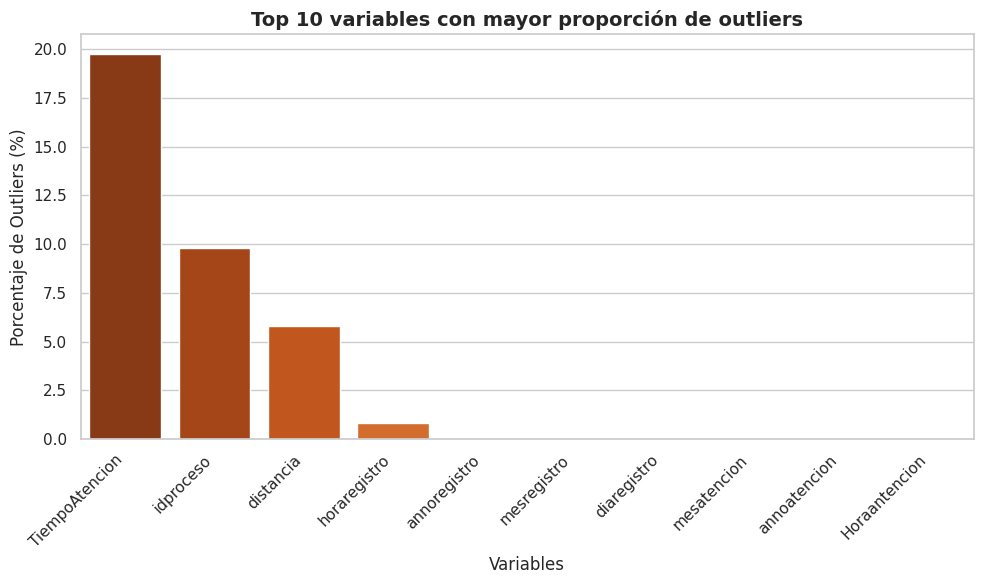

Ejemplo de distribución y outliers para: TiempoAtencion

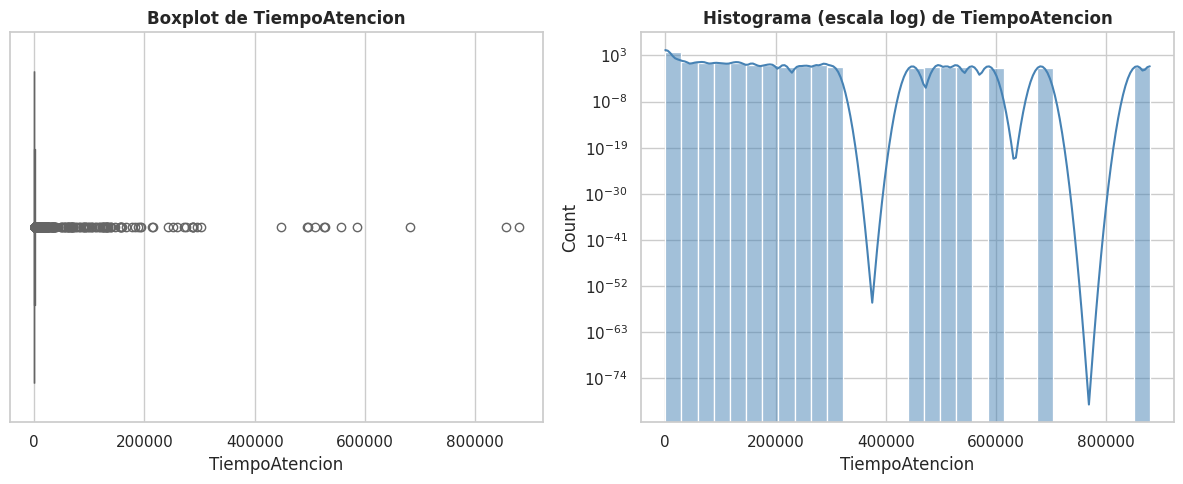

[REPORTE INTERPRETATIVO]

-------------------------------------------------

-Total de variables numéricas analizadas: 11

-Variables con presencia de outliers: 4

-Total de registros atípicos detectados (sumados): 2911

RESUMEN EJECUTIVO:

    El análisis mediante el método del rango intercuartílico (IQR) identificó valores atípicos
    en 4 variables numéricas del conjunto de datos. Estos outliers representan
    posibles errores de captura, valores extremos o casos excepcionales que podrían distorsionar
    los modelos predictivos. Se recomienda revisar las variables con mayor porcentaje de outliers
    (especialmente las que superan el 5–10%) y definir una estrategia adecuada: recorte, imputación,
    transformación logarítmica o modelado robusto.

In [12]:
# ============================================================
# DETECCIÓN DE OUTLIERS (VALORES ATÍPICOS)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detectar_outliers(df, factor=1.5, top_n=10):
    """
    Detecta y analiza valores atípicos en columnas numéricas usando el método IQR.
    Genera tabla, gráficos y reporte interpretativo.

    Parámetros:
    ------------
    df : DataFrame
        Dataset original.
    factor : float (default=1.5)
        Factor multiplicador del rango intercuartílico para definir outliers.
    top_n : int (default=10)
        Número de variables a graficar (las más afectadas por outliers).
    """

    print("============================================================")
    print(" INICIO DEL ANÁLISIS DE OUTLIERS (Método IQR)")
    print("============================================================")

    # 1️ Seleccionar solo columnas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if not num_cols:
        print(" No se encontraron columnas numéricas en el dataset.")
        return None

    # 2️ Calcular límites y cantidad de outliers
    outlier_stats = []

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - factor * IQR
        upper_limit = Q3 + factor * IQR

        # Conteo de outliers
        outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]
        num_outliers = outliers.count()

        outlier_stats.append({
            'Variable': col,
            'Outliers': num_outliers,
            'Porcentaje (%)': (num_outliers / len(df)) * 100,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Límite Inferior': lower_limit,
            'Límite Superior': upper_limit
        })

    # 3️ Crear tabla resumen
    outlier_table = pd.DataFrame(outlier_stats).sort_values(
        by='Porcentaje (%)', ascending=False
    )

    # Mostrar tabla con formato
    print("\n\n[TABLA RESUMEN DE OUTLIERS] \n\n")
    display(
        outlier_table.style
        .format({'Porcentaje (%)': '{:.2f}%'})
        .background_gradient(cmap='Oranges', subset=['Porcentaje (%)'])
        .set_caption("Resumen de Outliers por Variable Numérica")
    )

    # 4️ Visualización: Top N variables con más outliers
    top_outliers = outlier_table.head(top_n)

    if not top_outliers.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x='Variable',
            y='Porcentaje (%)',
            data=top_outliers,
            palette='Oranges_r'
        )
        plt.title(f"Top {top_n} variables con mayor proporción de outliers", fontsize=14, fontweight='bold')
        plt.xlabel("Variables")
        plt.ylabel("Porcentaje de Outliers (%)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\n No se detectaron outliers en las columnas numéricas.")

    # 5️ Ejemplo gráfico de distribución (Boxplot e Histograma)
    if not top_outliers.empty:
        var_ejemplo = top_outliers.iloc[0]['Variable']
        print(f"\n Ejemplo de distribución y outliers para: {var_ejemplo}")

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Boxplot
        sns.boxplot(x=df[var_ejemplo], ax=axes[0], color='coral')
        axes[0].set_title(f"Boxplot de {var_ejemplo}", fontsize=12, fontweight='bold')

        # Histograma (escala logarítmica)
        sns.histplot(df[var_ejemplo], bins=30, kde=True, color='steelblue', ax=axes[1])
        axes[1].set_title(f"Histograma (escala log) de {var_ejemplo}", fontsize=12, fontweight='bold')
        axes[1].set_yscale('log')

        plt.tight_layout()
        plt.show()

    # 6️ Reporte interpretativo
    total_outliers = outlier_table['Outliers'].sum()
    cols_con_outliers = (outlier_table['Outliers'] > 0).sum()

    print("\n [REPORTE INTERPRETATIVO]")
    print("-------------------------------------------------")
    print(f"-Total de variables numéricas analizadas: {len(num_cols)}")
    print(f"-Variables con presencia de outliers: {cols_con_outliers}")
    print(f"-Total de registros atípicos detectados (sumados): {total_outliers}")

    resumen = f"""

     RESUMEN EJECUTIVO:

    El análisis mediante el método del rango intercuartílico (IQR) identificó valores atípicos
    en {cols_con_outliers} variables numéricas del conjunto de datos. Estos outliers representan
    posibles errores de captura, valores extremos o casos excepcionales que podrían distorsionar
    los modelos predictivos. Se recomienda revisar las variables con mayor porcentaje de outliers
    (especialmente las que superan el 5–10%) y definir una estrategia adecuada: recorte, imputación,
    transformación logarítmica o modelado robusto.

    """
    print(resumen)

    return outlier_table


# EJECUCIÓN DEL ANÁLISIS
outlier_table = detectar_outliers(df)


### **5.3.5. Hallazgo de Correlaciones**

============================================================

ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS (PEARSON)

============================================================

MATRIZ DE CORRELACIÓN:

,idproceso,annoregistro,mesregistro,diaregistro,horaregistro,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,distancia
idproceso,1.00,0.91,-0.05,0.01,-0.00,0.91,-0.04,0.01,0.05,0.01,0.00
annoregistro,0.91,1.00,-0.17,-0.00,0.00,1.00,-0.16,-0.00,0.07,0.01,0.00
mesregistro,-0.05,-0.17,1.00,-0.02,-0.00,-0.17,0.98,-0.02,-0.02,0.02,-0.01
diaregistro,0.01,-0.00,-0.02,1.00,-0.00,0.00,-0.02,0.91,0.01,0.02,0.01
horaregistro,-0.00,0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.59,0.00,0.01
annoatencion,0.91,1.00,-0.17,0.00,0.00,1.00,-0.16,-0.00,0.07,0.04,0.00
mesatencion,-0.04,-0.16,0.98,-0.02,-0.00,-0.16,1.00,-0.02,-0.02,-0.03,-0.02
diaatencion,0.01,-0.00,-0.02,0.91,0.00,-0.00,-0.02,1.00,-0.00,-0.01,0.01
Horaantencion,0.05,0.07,-0.02,0.01,0.59,0.07,-0.02,-0.00,1.00,0.03,0.00
TiempoAtencion,0.01,0.01,0.02,0.02,0.00,0.04,-0.03,-0.01,0.03,1.00,0.00


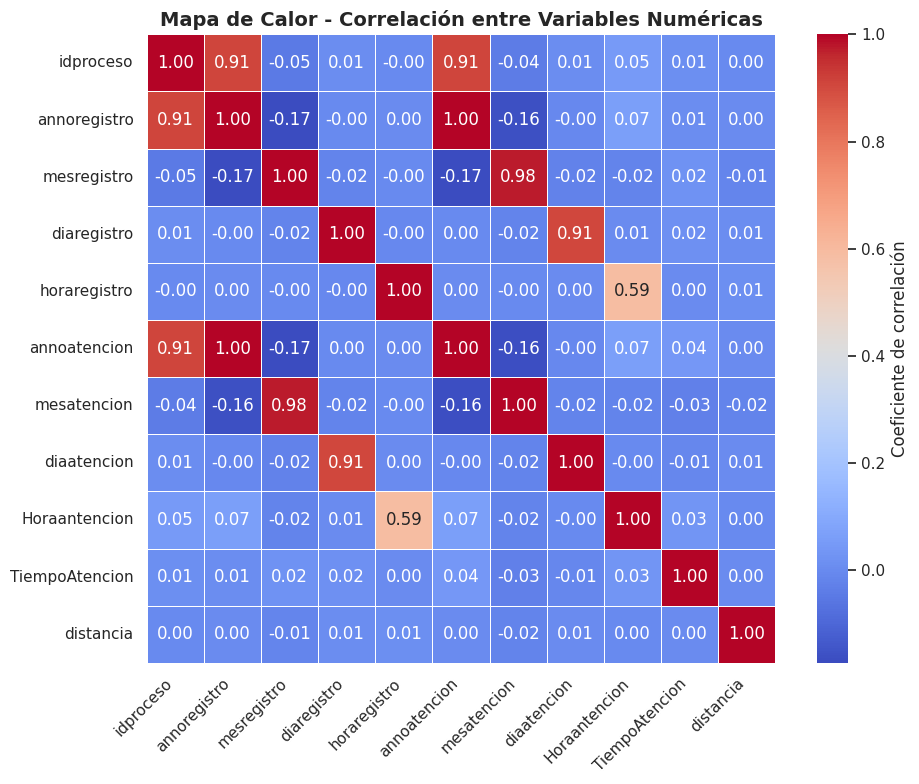

Top 5 pares de variables más correlacionadas:

,Variable 1,Variable 2,Correlación,Abs_Corr
16,annoregistro,annoatencion,0.999179,0.999179
68,mesatencion,mesregistro,0.976631,0.976631
5,idproceso,annoatencion,0.912668,0.912668
11,annoregistro,idproceso,0.912496,0.912496
80,diaatencion,diaregistro,0.906643,0.906643


INTERPRETACIÓN:

    El mapa de calor muestra el grado de relación lineal entre las variables numéricas.
    Los valores cercanos a 1 o -1 indican una fuerte correlación (positiva o negativa, respectivamente),
    mientras que valores próximos a 0 sugieren independencia entre variables.

    Las correlaciones altas pueden señalar redundancia de información, multicolinealidad o dependencia
    entre variables, aspectos relevantes al momento de construir modelos predictivos.
    Se recomienda analizar especialmente las variables con correlación absoluta superior a 0.8.

In [13]:
# ============================================================
#  MAPA DE CALOR - CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# ============================================================

def mapa_calor_correlacion(df, metodo='pearson', top_corr=5):
    """
    Genera un mapa de calor para visualizar la correlación entre variables numéricas.
    Además, identifica las variables más fuertemente correlacionadas.

    Parámetros:
    ------------
    df : DataFrame
        Dataset a analizar.
    metodo : str, default='pearson'
        Tipo de correlación ('pearson', 'spearman' o 'kendall').
    top_corr : int, default=5
        Número de pares de variables con mayor correlación mostradas en el resumen.
    """

    print("============================================================")
    print(f" ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS ({metodo.upper()})")
    print("============================================================")

    # Seleccionar columnas numéricas
    num_cols = df.select_dtypes(include=[np.number])

    if num_cols.empty:
        print(" No se encontraron variables numéricas en el dataset.")
        return None

    # Calcular la matriz de correlación
    corr_matrix = num_cols.corr(method=metodo)

    # Mostrar matriz de correlación (numérica)
    print("\n MATRIZ DE CORRELACIÓN:")
    display(corr_matrix.round(2))

    # 4️ Generar el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        linewidths=0.5,
        cbar_kws={'label': 'Coeficiente de correlación'},
        square=True
    )
    plt.title("Mapa de Calor - Correlación entre Variables Numéricas", fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Identificar las correlaciones más altas (sin duplicados ni autovalores)
    corr_pairs = (
        corr_matrix.unstack()
        .reset_index()
        .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlación'})
    )
    corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
    corr_pairs['Abs_Corr'] = corr_pairs['Correlación'].abs()
    corr_pairs = corr_pairs.sort_values(by='Abs_Corr', ascending=False).drop_duplicates(subset=['Abs_Corr'])

    # Mostrar top de correlaciones más fuertes
    print(f"\n Top {top_corr} pares de variables más correlacionadas:")
    display(corr_pairs.head(top_corr))

    # Interpretación automática
    resumen = f"""

     INTERPRETACIÓN:

    El mapa de calor muestra el grado de relación lineal entre las variables numéricas.
    Los valores cercanos a 1 o -1 indican una fuerte correlación (positiva o negativa, respectivamente),
    mientras que valores próximos a 0 sugieren independencia entre variables.

    Las correlaciones altas pueden señalar redundancia de información, multicolinealidad o dependencia
    entre variables, aspectos relevantes al momento de construir modelos predictivos.
    Se recomienda analizar especialmente las variables con correlación absoluta superior a 0.8.

    """
    print(resumen)

    return corr_matrix, corr_pairs



#  EJECUCIÓN DEL ANÁLISIS
corr_matrix, corr_pairs = mapa_calor_correlacion(df)


### **5.3.6. Análisis Exploratorio Inicial EDA TiempoAtencion**

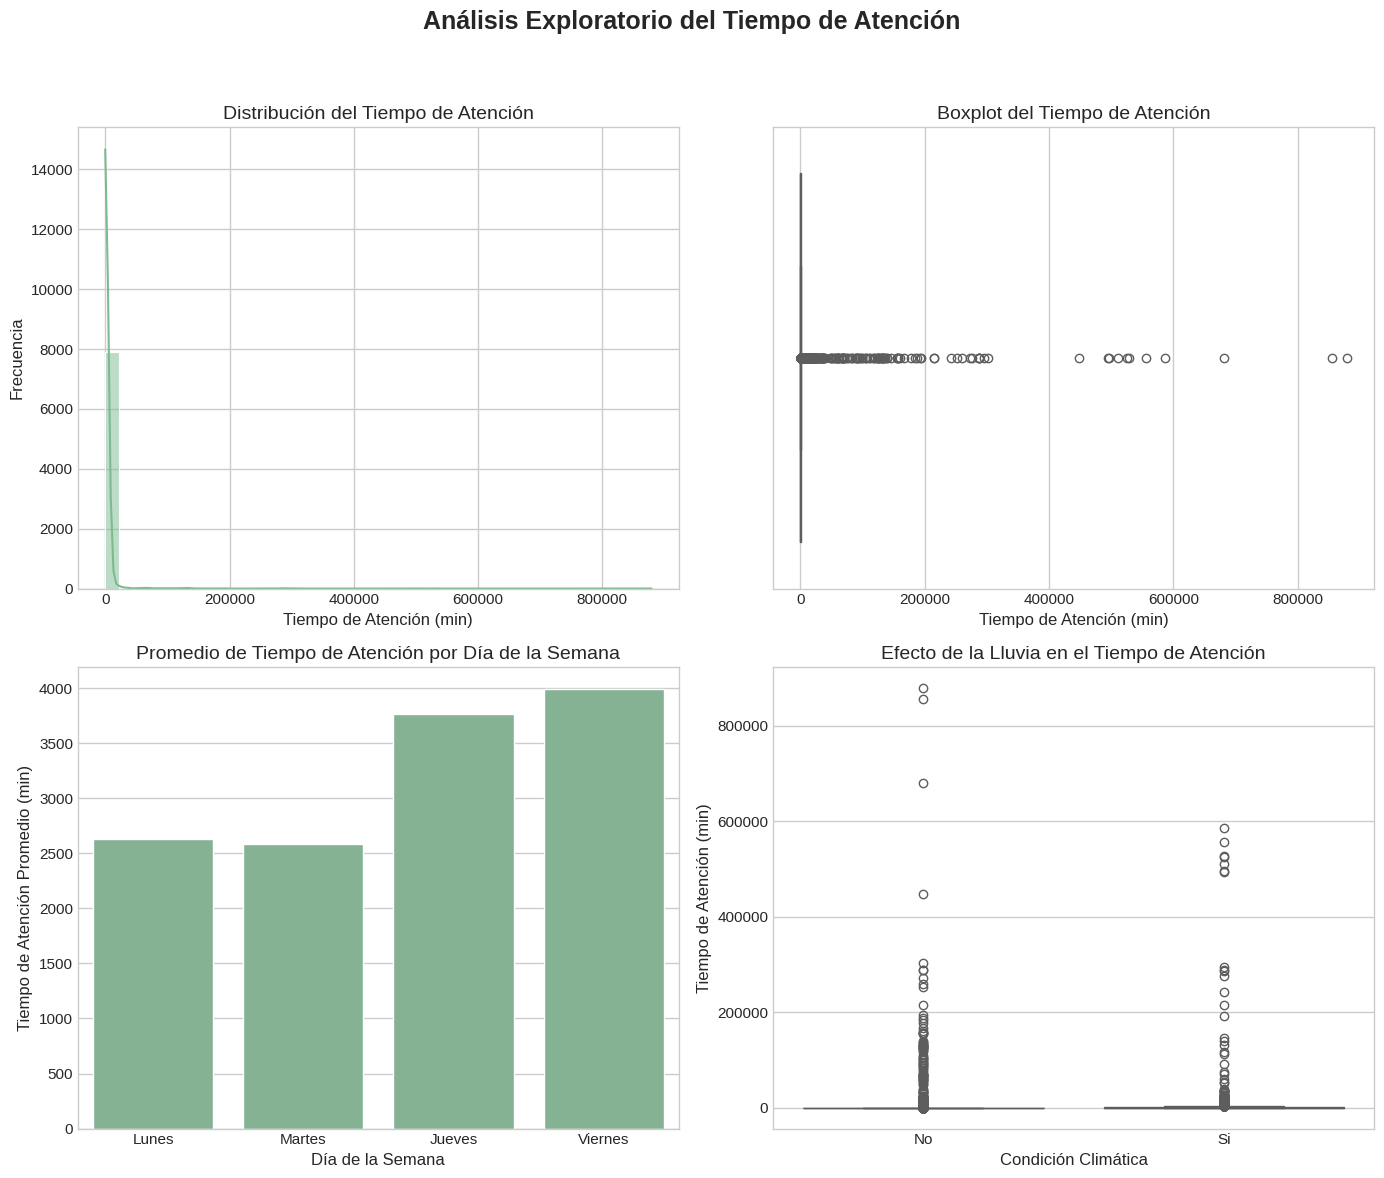

In [14]:
# ===========================================================
# ANÁLISIS EXPLORATORIO: DISTRIBUCIÓN DEL TIEMPO DE ATENCIÓN
# ===========================================================

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("crest")

# Crear figura (sin franja ni municipio)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Análisis Exploratorio del Tiempo de Atención', fontsize=18, fontweight='bold')


# Distribución general
if 'TiempoAtencion' in df.columns and df['TiempoAtencion'].notna().sum() > 0:
    sns.histplot(df['TiempoAtencion'].dropna(), bins=40, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Distribución del Tiempo de Atención', fontsize=14)
    axes[0, 0].set_xlabel('Tiempo de Atención (min)')
    axes[0, 0].set_ylabel('Frecuencia')
else:
    axes[0, 0].text(0.5, 0.5, 'Sin datos de Tiempo de Atención', ha='center', va='center')
    axes[0, 0].set_title('Distribución del Tiempo de Atención')

# Boxplot general
if 'TiempoAtencion' in df.columns and df['TiempoAtencion'].notna().sum() > 0:
    sns.boxplot(x=df['TiempoAtencion'].dropna(), ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot del Tiempo de Atención', fontsize=14)
    axes[0, 1].set_xlabel('Tiempo de Atención (min)')
else:
    axes[0, 1].text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
    axes[0, 1].set_title('Boxplot del Tiempo de Atención')


# Promedio por día de la semana
if 'diasemana' in df.columns and df['diasemana'].notna().sum() > 0:
    dias_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    sns.barplot(
        x='diasemana', y='TiempoAtencion', data=df,
        estimator='mean', errorbar=None, ax=axes[1, 0],
        order=[d for d in dias_order if d in df['diasemana'].unique()]
    )
    axes[1, 0].set_title('Promedio de Tiempo de Atención por Día de la Semana', fontsize=14)
    axes[1, 0].set_xlabel('Día de la Semana')
    axes[1, 0].set_ylabel('Tiempo de Atención Promedio (min)')
else:
    axes[1, 0].text(0.5, 0.5, 'Columna "diasemana" no disponible', ha='center', va='center')
    axes[1, 0].set_title('Promedio de Tiempo de Atención por Día de la Semana')


# Efecto de la lluvia
if 'Lluvia' in df.columns and df['Lluvia'].notna().sum() > 0:
    sns.boxplot(x='Lluvia', y='TiempoAtencion', data=df, ax=axes[1, 1])
    axes[1, 1].set_title('Efecto de la Lluvia en el Tiempo de Atención', fontsize=14)
    axes[1, 1].set_xlabel('Condición Climática')
    axes[1, 1].set_ylabel('Tiempo de Atención (min)')
else:
    axes[1, 1].text(0.5, 0.5, 'Columna "Lluvia" no disponible', ha='center', va='center')
    axes[1, 1].set_title('Efecto de la Lluvia')


# Ajustar diseño general
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **5.3.7. Gráfico Boxplots Top 5 de Categorías con Valores atípicos (Outlier)**

Variables con mayor porcentaje de outliers: ['TiempoAtencion', 'idproceso', 'distancia', 'horaregistro', 
'annoregistro']

,Variable,Outliers (%)
0,TiempoAtencion,19.776119
1,idproceso,9.825871
2,distancia,5.783582
3,horaregistro,0.820896
4,annoregistro,0.000000


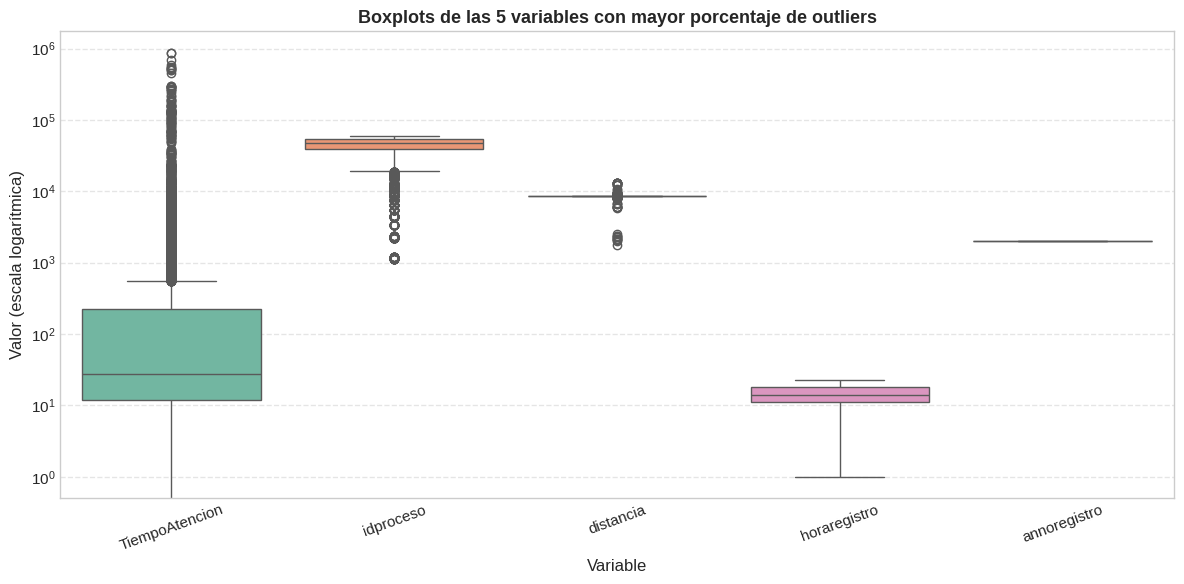

In [15]:
# ============================================================
#   Boxplots de las 5 variables con mayor % de outliers (mejorado)
# ============================================================

def boxplots_outliers_top5(df, top_n=5, escala='log'):
    """
    Muestra boxplots de las variables con mayor % de outliers,
    aplicando mejoras visuales y opcionalmente escala logarítmica.
    """

    # Seleccionar variables numéricas
    df_num = df.select_dtypes(include=[np.number])

    # Calcular porcentaje de outliers
    outlier_stats = []
    for col in df_num.columns:
        Q1 = df_num[col].quantile(0.25)
        Q3 = df_num[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df_num[col] < lower) | (df_num[col] > upper)).sum()
        outlier_stats.append({'Variable': col, 'Outliers (%)': (outliers / len(df)) * 100})

    # Crear DataFrame resumen
    outlier_df = pd.DataFrame(outlier_stats).sort_values('Outliers (%)', ascending=False).reset_index(drop=True)

    # Seleccionar top N variables
    top_vars = outlier_df.head(top_n)['Variable'].tolist()

    print(f"\n Variables con mayor porcentaje de outliers: {top_vars}")
    display(outlier_df.head(top_n))

    # Preparar datos para el boxplot
    df_melt = df_num[top_vars].melt(var_name='Variable', value_name='Valor')

    # Gráfico
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_melt, x='Variable', y='Valor', palette='Set2', showfliers=True, linewidth=1)

    if escala == 'log':
        plt.yscale('log')
        plt.ylabel("Valor (escala logarítmica)")
    else:
        plt.ylabel("Valor")

    plt.title(f"Boxplots de las {top_n} variables con mayor porcentaje de outliers", fontsize=13, fontweight='bold')
    plt.xticks(rotation=20, ha='center')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return outlier_df

# Ejecutar
outlier_df = boxplots_outliers_top5(df, top_n=5, escala='log')
